### Periodic grating


In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

-----------
Initializing structure...
time for choose_chunkdivision = 0.000117064 s
Working in 2D dimensions.
Computational cell is 16 x 0.02 x 0 with resolution 50
     block, center = (0,0,0)
          size (6,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)
     block, center = (0,0,0)
          size (0.5,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.24,10.24,10.24)
     block, center = (1,0,0)
          size (0.5,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.24,10.24,10.24)
     block, center = (2,0,0)
          size (0.5,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.24,10.24,10.24)
     block, center = (3,0,0)
          size (0.5,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.24,10.24,10.2

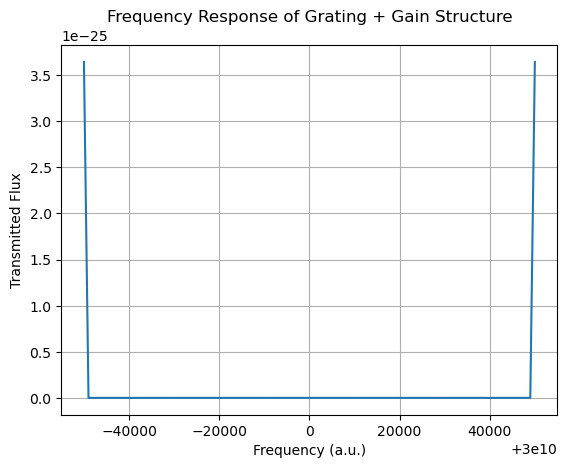

In [2]:
# --- define parameters ---
cell_x = 16
cell = mp.Vector3(cell_x, 0, 0)

resolution = 50
n_gain = 3.5
n_grating = 3.2
n_bg = 1.0

grating_period = 1
bar_width = 0.5
num_grating = 8

# --- define geometry structure ---
geometry = []

# the gain region
geometry.append(mp.Block(center=mp.Vector3(),
                         size=mp.Vector3(6, mp.inf),
                         material=mp.Medium(index=n_gain)))

# --- periodic grating structure ---
for i in range(num_grating):
    x_pos = i * grating_period
    geometry.append(mp.Block(center=mp.Vector3(x_pos, 0),
                             size=mp.Vector3(bar_width, mp.inf),
                             material=mp.Medium(index=n_grating)))

# --- define a broadband gaussian source ---
sources = [mp.Source(mp.GaussianSource(frequency=3e10, fwidth=0.1),
                     component=mp.Ez,
                     center=mp.Vector3(-6))]

# --- Add a flux monitor to record transmission spectrum ---
tran_fr = mp.FluxRegion(center=mp.Vector3(6))
frequencies = np.linspace(2e10, 4e10, 100)

# --- Set up simulation ---
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=[mp.PML(1.0)],
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

tran = sim.add_flux(3e10,1e5,100, tran_fr)
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, mp.Vector3(6), 1e-5))

# --- Extract and plot transmission spectrum ---
flux_vals = mp.get_fluxes(tran)
freqs = mp.get_flux_freqs(tran)

plt.plot(freqs, flux_vals)
plt.xlabel("Frequency (a.u.)")
plt.ylabel("Transmitted Flux")
plt.title("Frequency Response of Grating + Gain Structure")
plt.grid(True)
plt.show()


In [10]:
import meep as mp

resolution = 50
sx = 12
sy = 5
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(1.0)]

# 各层厚度（单位：μm）
padge_thickness = 0.08
ngaas_thickness = 0.1
ti_thickness = 0.02
au_thickness = 0.18
core_thickness = 2.5
substrate_thickness = 1.0

# 材料定义（近似 ε = n^2）
si_gaas = mp.Medium(epsilon=12.9)
qcl_core = mp.Medium(epsilon=13.0)
ngaas = mp.Medium(epsilon=12.5)
pdge = mp.Medium(epsilon=10.0)
ti = mp.Medium(epsilon=6.0)
au = mp.Medium(epsilon=9.5)

geometry = []

# Substrate
geometry.append(mp.Block(
    material=si_gaas,
    size=mp.Vector3(mp.inf, substrate_thickness),
    center=mp.Vector3(y=-sy/2 + substrate_thickness/2)
))

# QCL active region
geometry.append(mp.Block(
    material=qcl_core,
    size=mp.Vector3(mp.inf, core_thickness),
    center=mp.Vector3(y=-sy/2 + substrate_thickness + core_thickness/2)
))

# 上层金属叠层
y0 = -sy/2 + substrate_thickness + core_thickness
geometry += [
    mp.Block(material = pdge, size = mp.Vector3(mp.inf, padge_thickness), center = mp.Vector3(y=y0 + padge_thickness/2)),
    mp.Block(material = ngaas, size = mp.Vector3(mp.inf, ngaas_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness/2)),
    mp.Block(material = ti, size = mp.Vector3(mp.inf, ti_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness + ti_thickness/2)),
    mp.Block(material = au, size = mp.Vector3(mp.inf, au_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness + ti_thickness + au_thickness/2))
]

# Source
sources = [mp.Source(
    src=mp.GaussianSource(frequency=1/0.1, fwidth=0.2),
    component=mp.Ez,
    center=mp.Vector3(-3, -sy/2 + 0.5),
    size=mp.Vector3(0, 1.0)
)]

tran_fr = mp.FluxRegion(center=mp.Vector3(6))
frequencies = np.linspace(10,10,100)

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)

# sim.plot2D()
tran = sim.add_flux(10,10,100,tran_fr)
sim.run(until=50)

# --- Extract and plot transmission spectrum ---
flux_vals = mp.get_fluxes(tran)
freqs = mp.get_flux_freqs(tran)

plt.plot(freqs, flux_vals)
plt.xlabel("Frequency (a.u.)")
plt.ylabel("Transmitted Flux")
plt.title("Frequency Response of Grating + Gain Structure")
plt.grid(True)
plt.show()



-----------
Initializing structure...
time for choose_chunkdivision = 0.000391006 s
Working in 2D dimensions.
Computational cell is 12 x 5 x 0 with resolution 50
     block, center = (0,-2,0)
          size (1e+20,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.9,12.9,12.9)
     block, center = (0,-0.25,0)
          size (1e+20,2.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     block, center = (0,1.04,0)
          size (1e+20,0.08,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10,10,10)
     block, center = (0,1.13,0)
          size (1e+20,0.1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.5,12.5,12.5)
     block, center = (0,1.19,0)
          size (1e+20,0.02,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6,6,6)
     block, center =

RuntimeError: meep: Could not determine normal direction for given grid_volume.